# GPELab simulation results:
## Plot energy and spin fractions for different values of $\Omega$

Parameters of the simulation:<br>
a11 = (86.4014*a_bohr); <br>
a22 = (33.2021*a_bohr);<br>
a12 = (-53.1907*a_bohr);<br>

n1D = 2.7e9;

$\omega_r$ = 169 * (2 pi) #Hz <br>
$\omega_z$ = 26 * (2 pi) #Hz


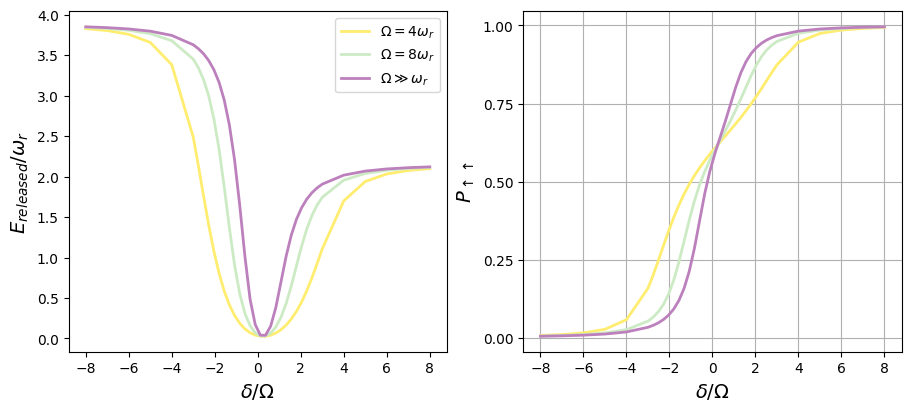

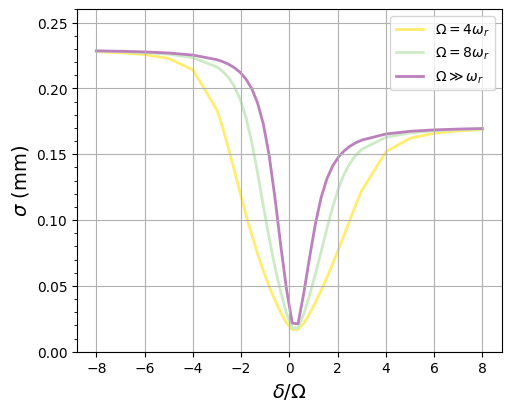

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

mat = scipy.io.loadmat(r'C:\Users\sarat\OneDrive\Documenti\InstOptique\Simulations\GPELab\outputs\results\25-02-17\output_data.mat')
delta_values = mat.get('delta_values').squeeze()
Omega_values = mat.get('Omega_values').squeeze()
P_down  = mat.get('P_down')
IE = mat.get('IE')
KE = mat.get('KE')
RE = mat.get('RE')
PE = mat.get('PE')
e_tot = mat.get('energy_tot')
 
sizeBEC = np.zeros_like(e_tot)

wr = 169*2*np.pi #Hz
wz = 26*2*np.pi  #Hz

#%% plots
colors = plt.get_cmap('Set3_r').colors
lw = 2

labels = [r'$\Omega = 4\omega_r$', r'$\Omega = 8\omega_r$', r'$\Omega \gg \omega_r$']
# Plotting the expressions
fig, ax = plt.subplots(1,2,constrained_layout=True, figsize=(9,4))


for i in range(np.size(Omega_values)):
    Om = Omega_values[i]
    
    e_rel = (e_tot[i,:]-RE[i,:])*Om/wr -1
    ax[0].plot(delta_values.T, e_rel, label=labels[i], lw=lw, color=colors[i])
    ax[1].plot(delta_values.T,P_down[i,:], lw=lw, color=colors[i])

ax[0].set_xlabel(r'$\delta/\Omega$', fontsize=14)
ax[0].set_ylabel(r'$E_{released}/\omega_r$',fontsize = 14)
ax[0].legend()

yticks = np.linspace(0,1,5)
ytick_labels = [r'$0$', r'$0.25$', r'$0.5$', r'$0.75$' , r'$1$']
ax[1].set_yticks(yticks)
ax[1].set_xlabel(r'$\delta/\Omega$', fontsize=14)
ax[1].set_ylabel(r'$P_{\uparrow\uparrow}$',fontsize = 14)
ax[1].grid()


#%% size after tof
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

figS, axS = plt.subplots(1,1,constrained_layout=True, figsize=(5,4))

for i in range(np.size(Omega_values)):
    Om = Omega_values[i]
    t_tof = 62.6e-3  #s
    
    e_rel = (IE[i,:]+KE[i,:]+PE[i,:])*(hbar*Om) - hbar*wr # energy tot - Rabi energy - hbar * wr
    v = np.sqrt(2*e_rel/m)   
    sizeBEC[i,:] = v * t_tof
    
    axS.plot(delta_values.T, sizeBEC[i,:]*10**3, label=labels[i], lw=lw, color=colors[i],zorder =1)
    
axS.set_xlabel(r'$\delta/\Omega$', fontsize=14)
axS.set_ylabel(r'$\sigma$ (mm)',fontsize = 14)  
axS.set_ylim(0,0.26)  
axS.yaxis.set_major_locator(MultipleLocator(0.05))
axS.yaxis.set_major_formatter('{x:.2f}')
axS.yaxis.set_minor_locator(MultipleLocator(0.01))
#axS.spines['left'].set_position(('data', 0))
#axS.spines['left'].set_zorder(10)
axS.legend()
axS.grid()

## Plot energy dcomposition for one single curve (low Omega)

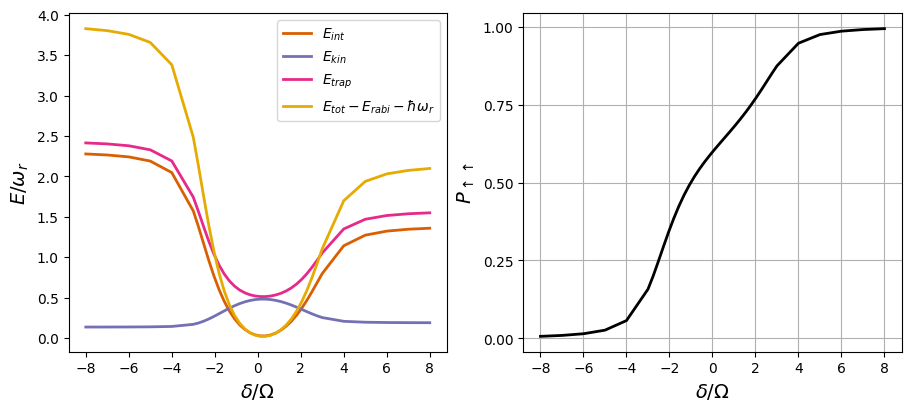

In [8]:
# select the curve
i = 0
Om = Omega_values[i]

wr = 169*2*np.pi #Hz
wz = 26*2*np.pi  #Hz

#%%
colors = plt.get_cmap('Set3').colors
colors2 = plt.get_cmap('Dark2').colors
lw = 2

labels = [r'$\Omega = 4\omega_r$', r'$\Omega = 8\omega_r$', r'$\Omega \gg \omega_r$']
# Plotting the expressions
fig, ax = plt.subplots(1,2,constrained_layout=True, figsize=(9,4))

ax[0].plot(delta_values.T, IE[i,:]*Om/wr, label=r"$E_{int}$", lw=lw, color=colors2[1])
ax[0].plot(delta_values.T, KE[i,:]*Om/wr, label=r'$E_{kin}$', lw=lw, color=colors2[2])
ax[0].plot(delta_values.T, PE[i,:]*Om/wr, label=r'$E_{trap}$', lw=lw, color=colors2[3])
ax[0].plot(delta_values.T, (IE[i,:]+KE[i,:]+PE[i,:])*Om/wr - 1, label=r'$E_{tot}-E_{rabi}-\hbar\omega_r$', lw=lw, color=colors2[5])
ax[1].plot(delta_values.T,P_down[i,:], lw=lw, color='black')

ax[0].set_xlabel(r'$\delta/\Omega$', fontsize=14)
ax[0].set_ylabel(r'$E/\omega_r$',fontsize = 14)
ax[0].legend()

yticks = np.linspace(0,1,5)
ytick_labels = [r'$0$', r'$0.25$', r'$0.5$', r'$0.75$' , r'$1$']
ax[1].set_yticks(yticks)
ax[1].set_xlabel(r'$\delta/\Omega$', fontsize=14)
ax[1].set_ylabel(r'$P_{\uparrow\uparrow}$',fontsize = 14)
ax[1].grid()

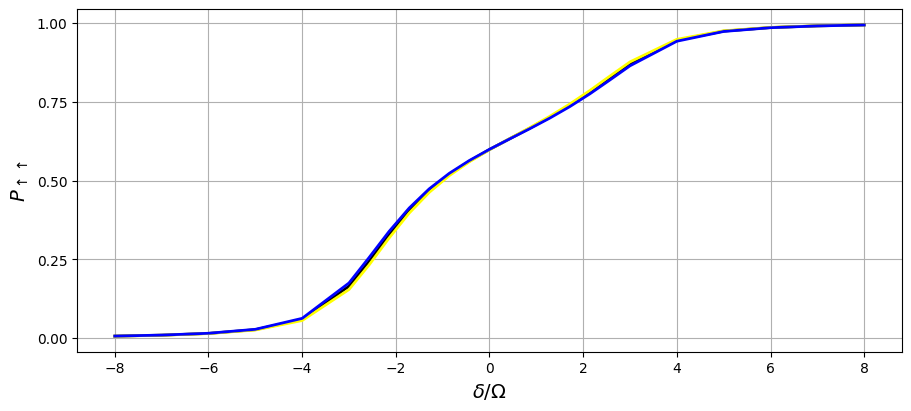

In [17]:
mat = scipy.io.loadmat(r'C:\Users\sarat\OneDrive\Documenti\InstOptique\Simulations\GPELab\outputs\results\output_data.mat')


delta_values = mat.get('delta_values').squeeze()
Omega_values = mat.get('Omega_values').squeeze()
P_down  = mat.get('P_down')
IE = mat.get('IE')
KE = mat.get('KE')
RE = mat.get('RE')
PE = mat.get('PE')
e_tot = mat.get('energy_tot')

average = np.mean(P_down, axis=0)

fig, ax = plt.subplots(1,1,constrained_layout=True, figsize=(9,4))

ax.plot(delta_values.T, average, lw=lw, color='black')
ax.plot(delta_values.T, P_down[0,:], lw=lw, color='yellow')
ax.plot(delta_values.T, P_down[19,:], lw=lw, color='blue')

yticks = np.linspace(0,1,5)
ytick_labels = [r'$0$', r'$0.25$', r'$0.5$', r'$0.75$' , r'$1$']
ax.set_yticks(yticks)
ax.set_xlabel(r'$\delta/\Omega$', fontsize=14)
ax.set_ylabel(r'$P_{\uparrow\uparrow}$',fontsize = 14)
ax.grid()